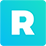

# **HANDLING MISSING DATA WITH PANDAS**

pandas borrows all the capabilities from numpy selection + adds a number of convenient methods to handle missing values. Let's see one at a time:

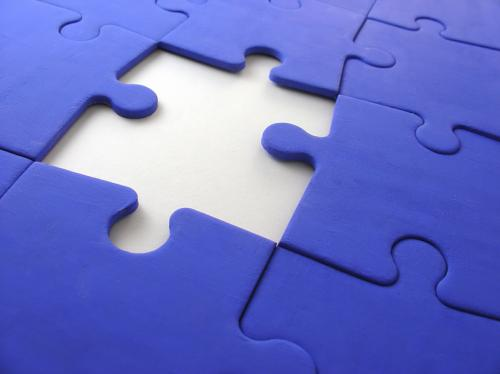

# A. Import libraries

In [64]:
import numpy as np
import pandas as pd

print('numpy ', np.__version__)
print('pandas', pd.__version__)

numpy  1.25.2
pandas 1.5.3


# B. Pandas utility function

Similarly to `numpy`, pandas also has a few utility function to indetify and detect `null values`

## B1. pd.isnull, pd.isna, pd.notnull, pd.notna

In [65]:
pd.isnull(np.nan)

True

In [66]:
pd.isnull(None)

True

In [67]:
pd.isna(np.nan)

True

In [68]:
pd.isna(None)

True

In [69]:
pd.notnull(np.nan)

False

In [70]:
pd.notnull(None)

False

In [71]:
pd.notna(np.nan)

False

In [72]:
pd.notna(None)

False

## B2. Use them on the Series and DataFrame

These function also work with `Series` and `DataFrame`

In [73]:
pd.isnull(pd.Series([1, 2, np.nan, 3, 4]))

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [74]:
x = pd.isnull(pd.DataFrame({
    'column A' : [1, np.nan, 7],
    'column B' : [np.nan, 2, 3],
    'column C' : [np.nan, 2, np.nan]
}))
x

,column A,column B,column C
0,False,True,True
1,True,False,False
2,False,False,True


In [75]:
x.sum(axis=1)


0    2
1    1
2    1
dtype: int64

## B3. Pandas operation with missing values

Pandas manages missing values more gracefully than numpy. `nan` will no longer behave as "viruses", and operation it just ignore them completely.

In [76]:
pd.Series([1, 2, 3, np.nan, 4, 5]).count()

5

In [77]:
pd.Series([2, 4, np.nan, 7, np.nan, 3]).mean()

4.0

# C. Filtering missing data

As we saw in numpy, we could combine boolean selection `pd.isnull` to filter this `nan`s and `null` values

In [78]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [79]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [80]:
# we can count the missing values with the sum funtion
pd.isnull(s).sum()

2

In [81]:
pd.notnull(s).sum()

4

In [82]:
# we can only get the non-blank values, by filtering them.
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

But both `notnull` and `isnull` are also methods of `Series` and `DataFrames`, so we could use it that way:

In [83]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [84]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [85]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

# D. Dropping not null values

Boolean selection + `notnull()` seems a little bit `verbose and repetitive`. And as we said before: any repetitive task will probably have a better, more DRY way. In this case, we can use the `dropna` method:



## D1. dropna

In [86]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [87]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

## D2. Dropping not null values on DataFrame

You saw how simple it is to drop nas with a Series. But with DataFrames, there will be a few more things to consider, because you `can't drop single values`. You can only `drop entire columns or rows`. Let's start with a sample DataFrame:



In [88]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [89]:
print("df.shape:", df.shape,"\n")
df.info()

df.shape: (4, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [90]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [91]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [92]:
df.isnull().sum(1)

0    1
1    1
2    0
3    2
dtype: int64

The default `dropna` behavior will drop all the rows in which any null value is present:



In [93]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In this case we're dropping rows. Rows containing `null` values are dropped from the DF. You can also use the axis parameter to drop columns containing null values:



In [94]:
df.dropna(axis = 1)

,Column D
0,5
1,8
2,34
3,110


In this case, any row or column that contains **at least** one null value will be dropped. Which can be, depending on the case, too extreme. You can control this behavior with the `how` parameter. Can be either '`any`' or '`all`':

In [95]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [96]:
print(df2)
df2.dropna(how = 'all')

   Column A  Column B  Column C
0       1.0       2.0       NaN
1       NaN       NaN       NaN
2      30.0      31.0     100.0


,Column A,Column B,Column C
0,1.0,2.0,NaN
2,30.0,31.0,100.0


In [97]:
df2.dropna(how = 'any')

,Column A,Column B,Column C
2,30.0,31.0,100.0


You can also use the `thresh` parameter to indicate a threshold (a minimum number) of non-null values for the row/column to be kept:

In [98]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [99]:
df.dropna(thresh = 3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [100]:
df.dropna(thresh = 3, axis = 'columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


# E. Filling not values

Sometimes instead than dropping the null values, we might need to replace them with some other value. This highly depends on your context and the dataset you're currently working. Sometimes a nan can be replaced with a `0`, sometimes it can be replaced with the `mean` of the sample, and some other times you can take the `closest value`. Again, it depends on the context. We'll show you the different methods and mechanisms and you can then apply them to your own problem.



## E1. Filling not values for Series

### E1 a. Filling not values with arbitary values


In [101]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [102]:
# padding null values with zero
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [103]:
# padding null values with the mean
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

### E1 b. Filling not values with ontiguous (close) values

The `method` argument is used to fill null values with other values `close` to that null one:

In [104]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [105]:
# the method 'ffill' returns the immediately preceding value
s.fillna(method= 'ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [106]:
# the method 'bfill' retrurns the next value
s.fillna(method = 'bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

This can still `leave null values` at the `extremes` of the Series/DataFrame:

In [107]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method = 'ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [108]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method = 'bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

## E2. Filling null values for DataFrame

The `fillna` method also works on `DataFrames`, and it works similarly. The main differences are that you can `specify the axis` (as usual, rows or columns) to use to fill the values (specially for methods) and that you have more control on the values passed:

### E2 a. Filling nulls with arbitary values

In [109]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [110]:
df.fillna({'Column A' : 0, 'Column B' : 99, 'Column C' : df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


### E2 b. Filling nulls with contigous(close) values

In [111]:
df.fillna(method = 'ffill', axis = 0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [112]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [113]:
df.fillna(method = 'ffill', axis = 1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


In [114]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [115]:
df.fillna(method = 'bfill', axis = 0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,9.0,5
1,30.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [116]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [117]:
df.fillna(method = 'bfill', axis = 1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,5.0,5.0
1,8.0,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,100.0,100.0,100.0,110.0


# F. Checking if there are NAs

The question is: Does this `Series` or `DataFrame` contain any missing value? The answer should be yes or no: True or False. `How can you verify it?`

## F1. Checking the length

If there are missing values, `s.dropna()` will have less elements than `s`:

In [118]:
missing_values = len(s) != len(s.dropna())
missing_values

True

In [119]:
print(len(s))
print(len(s.dropna()))

6
4


In [120]:
missing_values = s.count() != len(s.dropna())
missing_values

False

In [124]:
print(s.count())
print(s.dropna().count())

4
4


# F2. More Pythonic solution ***any***

The methods `any` and `all` check if either there's any True value in a `Series` or all the values are `True`. They work in the same way as in Python:





In [125]:
pd.Series([True, False, False]).any()

True

In [126]:
pd.Series([True, False, False]).all()

False

The `isnull()` method returned a Boolean Series with `True` values wherever there was a `nan`:



In [127]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [130]:
s.isnull()
# s[s.isnull()]

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

So we can just use the `any` method with the boolean array returned:

In [133]:
print(pd.Series([1, np.nan]).isnull().any())
print(pd.Series([1, 2]).isnull().any())

True
False


In [135]:
s.isnull().any()

True

A more strict version would check only the values of the `Series`:

In [142]:
s.values

array([ 1.,  2.,  3., nan, nan,  4.])

In [138]:
s.isnull().values

array([False, False, False,  True,  True, False])

In [139]:
s.isnull().values.any()

True